In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
data = 'https://raw.githubusercontent.com/jacoblgoodman/DAV-5400/master/week6/diamonds.csv'

In [74]:
# read in data and sanity check
df = pd.read_csv(data)
print(df.shape)
display(df.head())

(53940, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Assignment:
Now that we have our data loaded with will begin to answer the following questions:
>1. What proportion of diamonds are between .30 and 1.08 carats?
2. How many of the diamonds have equal x and y dimensions?
3. How many of the diamonds have a carat less than the mean carat value?
4. How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are
ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal
5. Which diamond has the highest price per carat? What is its value?
6. Make a bar plot of the ‘cut’ data. What does it tell us about the frequencies of the individual cut values within
the data set?
7. Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance
of the boxplots.
8. Make histograms of the length, width, depth, and total depth attributes and discuss any conclusions you can
draw from the shape of the resulting distributions.
9. Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?

 ***
## 1. What proportion of diamonds are between .30 and 1.08 carats?

to find the answer to this question first we will visualize the variable to verify data then 
    we will utilize the count method to find the ratio with the following formula:
$$Answer =\frac{Subset}{Total}$$  
    


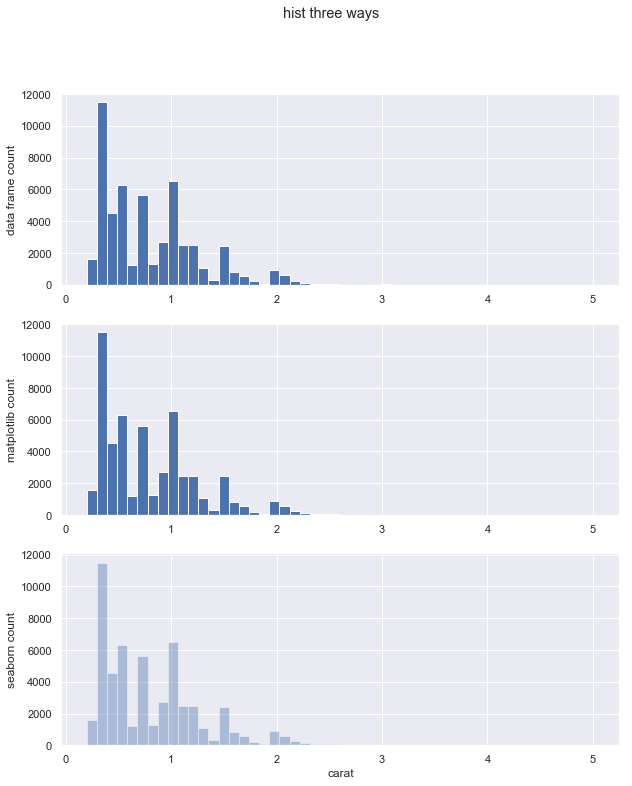

In [75]:
# eda visulation performed three times with syntax from seabon, matplot, and pandas and ploted together 
# using matplotlibs subplot 

plt.figure(1, figsize=(10, 12))
plt.subplot(311)
df.carat.plot.hist(bins=50);
plt.ylabel('data frame count')
plt.subplot(312)
plt.hist(df.carat, bins =50);
plt.ylabel('matplotlib count')
plt.subplot(313)
sns.distplot(df.carat, kde= False, bins =50);
plt.ylabel('seaborn count');
plt.suptitle('hist three ways');


In [76]:
#caculate proportion utlizing between method
p = sum(df.carat.between(.30,1.08)) /df.carat.count()
#print using f string
print(f'the Proportion of diamonds between .30 and 1.08 carats is {p:.3}')

the Proportion of diamonds between .30 and 1.08 carats is 0.747


__\*note above answer rounded to 3 decimal places for clarity__
***
## 2. How many of the diamonds have equal x and y dimensions?
To do some EDA on the two variables in question we will first plot them against each-other in a 
scatter plot. we will then `sum (data where x == y)`


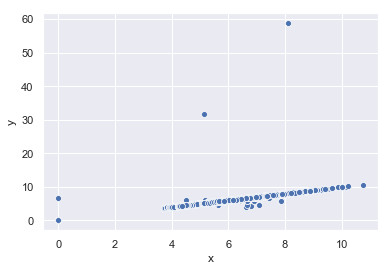

In [77]:
sns.scatterplot(x='x',y='y',data=df);

**observation**:
    the visualization identified outliers which will require further evaluation.
1. can diamonds have a y value greater than  20?
2. does it make sense for diamonds to have an x value of 0?

In [78]:
#return dataframe with conditions outlined above to review extra data and decide how to proceed
df[(df.x == 0) | (df.y>20)]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.00
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.00,0.00
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.00
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00


**conclusions**:
1. y values can have a very high upper bound all other data is present we will continue to include these values going forward 
2. x values can not realistically have a 0 value this most likely represents a data entry error any x or y == 0 will be excluded from analysis pertaining to these fields.

**next steps**:
 create a data frame meeting requirements outlined above to answer question and print answer 

In [79]:
df_x_y = df.loc[(df.x!=0)&(df.y!=0),:]

answer = df_x_y[df_x_y.x==df_x_y.y].count()['x']
print(f'The number of diamonds that have equal x and y values is {answer}')

The number of diamonds that have equal x and y values is 10


***
### 3. How many of the diamonds have a carat less than the mean carat value?
since we have already visualized this varible we will jump right in.  
_process:_  
utlize  the mean method  to return bool serries and sum method to return answer

In [80]:
answer = sum(df.carat<df.carat.mean())
print(f'The number of of diamonds having a carat less than the mean({df.carat.mean():.3}) is {answer}\
\nor {(answer/df.carat.count())*100:.4}% of the observations\
')

The number of of diamonds having a carat less than the mean(0.798) is 31127
or 57.71% of the observations


_Observation:_ this answer makes sense if we look back at our visualization from question 1 we will notice that carat variable does appear to be right skewed
***
### 4.  How many diamonds have a Premium cut or better? 
>Note: that the possible values for the quality of a cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal

*process*
1. EDA: we will verify the data with a bar plot:
   1. first with pandas built in and value_counts
   1. then with matplotlib and value_counts function
   1. seaborn with groupby   
   1. seaborn countplot
   
      
2. We will then utilize the isin method to find and count all $entries = Premium|ideal$

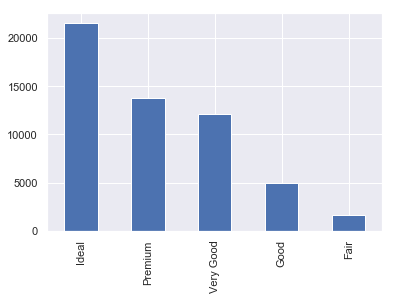

In [81]:
df.cut.value_counts().plot.bar();

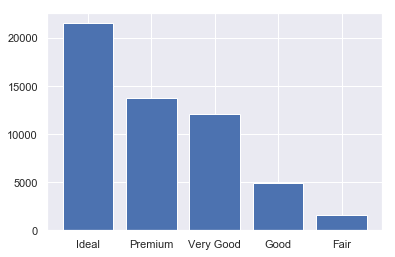

In [82]:
plt.bar(x = df.cut.value_counts().index,height =df.cut.value_counts());

,count
cut,
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


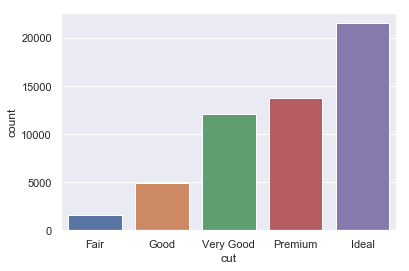

In [83]:
#group by carat and count rows to have count by carat
cut_group = df.groupby('cut').count()[['carat']].rename({'carat':'count'},axis ='columns').sort_values(by='count')
#display group for sanity and reference
display(cut_group)
#create barplot usind reset index function to expose index for use by barplot() func
sns.barplot(x='cut',y='count',data=cut_group.reset_index());

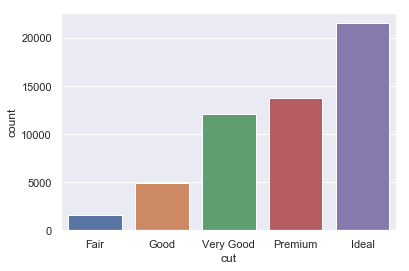

In [95]:
sns.countplot(x='cut',data=df,order=['Fair','Good','Very Good','Premium','Ideal']);

In [84]:
answer = sum(df.cut.isin(['Premium','Ideal']))
print(f'{answer:,.0f} diamonds have a premium or better cut') #comma added for readablity  

35,342 diamonds have a premium or better cut


***
### 5. Which diamond has the highest price per carat? What is its value?

**process**:
1. EDA of price variable: we will visualize this variable for sanity and outliers (carat field was visualized above and found to be within expectations) 
1. We will then create a new field in the data frame: $$PricePerCarat = \frac{price}{carat}$$
1. return item with the largest value and its index 

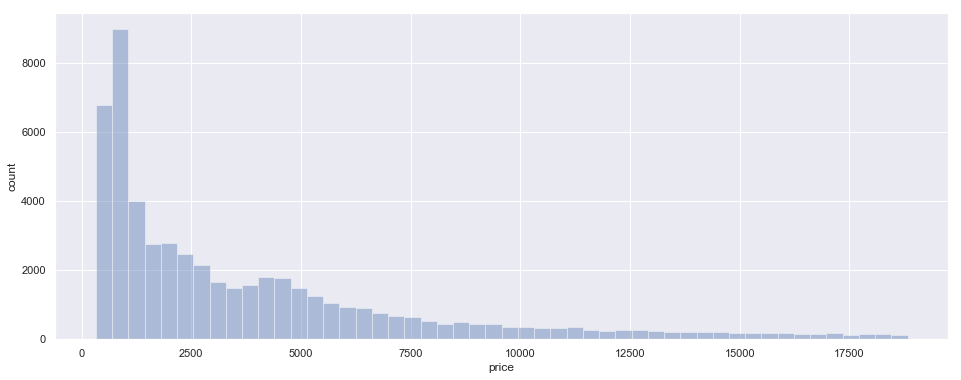

In [85]:
#1 eda
# figure size expanded from defaults to elucidate wide distribution 
plt.figure(figsize=(16, 6))
# plot generated via seaborn
sns.distplot(df.price,kde=False);
plt.ylabel('count');

**conclusion**
data looks reasonable moving on to step 2
>2. create a new field in data frame $price/carat$


In [86]:
# creating new field
df['PricePerCarat'] = round(df.price/df.carat,2)
#check ressults
display(df.sort_values(by='PricePerCarat',ascending=False).head())
#answer time:
#get index of fisrt value using idxmax func
diamond = df.PricePerCarat.idxmax()
#get value via max func
PricePerCarat = df.PricePerCarat.max()
#print answer
print(f'diamond #{diamond} has the highest price per carrat with a value of ${PricePerCarat:,.2f} Per carat')

,carat,cut,color,clarity,depth,table,price,x,y,z,PricePerCarat
27635,1.04,Very Good,D,IF,61.3,56.0,18542,6.53,6.55,4.01,17828.85
27530,1.07,Premium,D,IF,60.9,58.0,18279,6.67,6.57,4.03,17083.18
27226,1.03,Ideal,D,IF,62.0,56.0,17590,6.55,6.44,4.03,17077.67
27457,1.07,Very Good,D,IF,60.9,58.0,18114,6.57,6.67,4.03,16928.97
26998,1.02,Very Good,D,IF,61.7,59.0,17100,6.42,6.52,3.99,16764.71


diamond #27635 has the highest price per carrat with a value of $17,828.85 Per carat


**conclusion** while not it might not have been the heaviest (our EDA revealed diamonds over 2 carats) we found our diamond  with the highest Price Per Carat ratio
**note** for the price assumed to be in 
***
### 6. Make a bar plot of the ‘cut’ data. What does it tell us about the frequencies of the individual cut values within the data set?
**Process:**
    since we already made a bar plot of cut above we will make a Proportional bar chart.

**answer**
   as we look at the chart below we can see that as the "Quality" of the cut goes up so does its proportion in our data set with the 'Ideal' value accounting for nearly 40% of total data



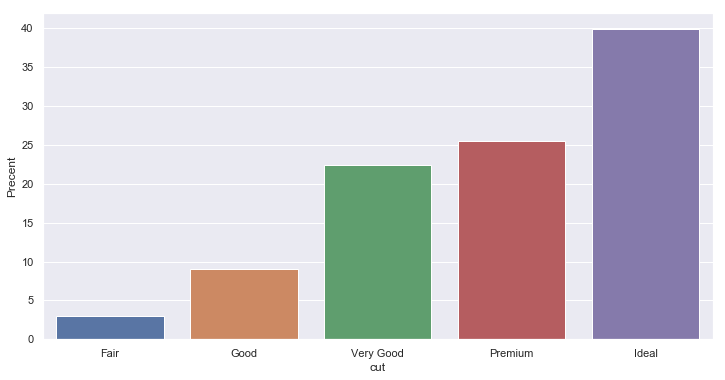

In [87]:
# techinque discovered on seaborns git https://github.com/mwaskom/seaborn/issues/1027
plt.figure(figsize=(12,6))
_ =sns.barplot(
        x="cut",
        y="x", 
        data=df,
        estimator=lambda x: len(x) / len(df) * 100,
        order =['Fair', 'Good' , 'Very Good' ,'Premium','Ideal'])

_=plt.ylabel('Precent')



***
### 7. Make boxplots of the diamond price for each cut and discuss any conclusions you can draw from the appearance

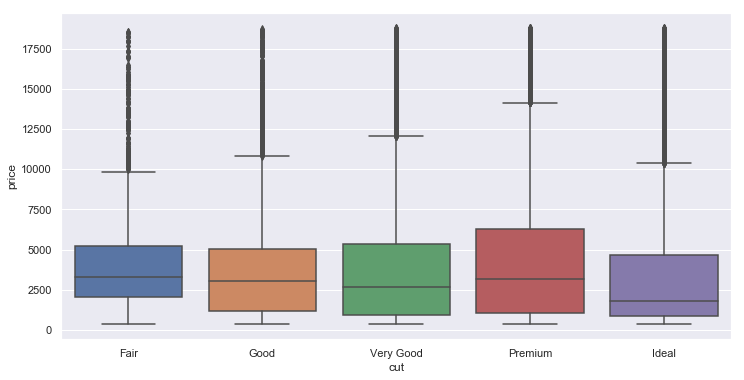

In [88]:
plt.figure(figsize=(12,6))
sns.boxplot(data= df, x= 'cut',y='price', order =['Fair', 'Good' , 'Very Good' ,'Premium','Ideal']);

**conclusions**
From the box plots, we can see two key features:
1. That as the quality of diamonds gets better, they don't get more expensive.
1. That each of these qualities has “outliers” (values greater than 1.5 IQR)  on the upper bound. 

From this we can conclude that Price is right skewed and that Price isn't correlated to Cut.

***

### 8. Make histograms of the length, width, depth, and total depth attributes and discuss any conclusions you can draw from the shape of the resulting distributions.

**Process**:
- All 4 variables will be plotted together with a fixed bins value of 50 for comparison.  
- Seaborn and matplotlib will be alternated for visual distinctness and practice.

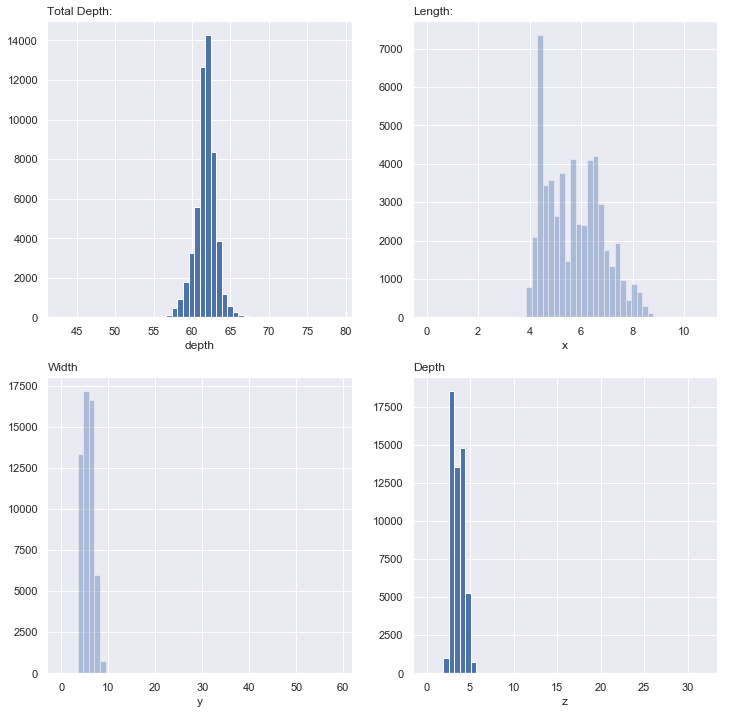

In [89]:
#set plot figure
plt.figure(1, figsize=(12, 12))

# 1st plot
plt.subplot(221)
_=plt.hist(df.depth, bins=50)
_=plt.title('Total Depth:', loc='left')
_=plt.xlabel('depth')

#2nd plot
plt.subplot(222)
_=sns.distplot(df.x, bins = 50,kde=False)
_= plt.title('Length:', loc='left')

# 3rd plot
plt.subplot(223)
_=sns.distplot(df.y, bins = 50, kde = False)
_=plt.title('Width', loc = 'left')

#4th plot
plt.subplot(224)
_=plt.hist(df.z, bins = 50)
_=plt.title('Depth', loc ='left')
_=plt.xlabel('z')


**Conclusions:**  
- Y and Z contain large outliers and are right skewed.
- Total depth is the most normally distributed of the 4 measurements.
- X is slightly left skewed but, as discussed in earlier analysis, this is mainly due to false missing values.



***
### 9. Make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?

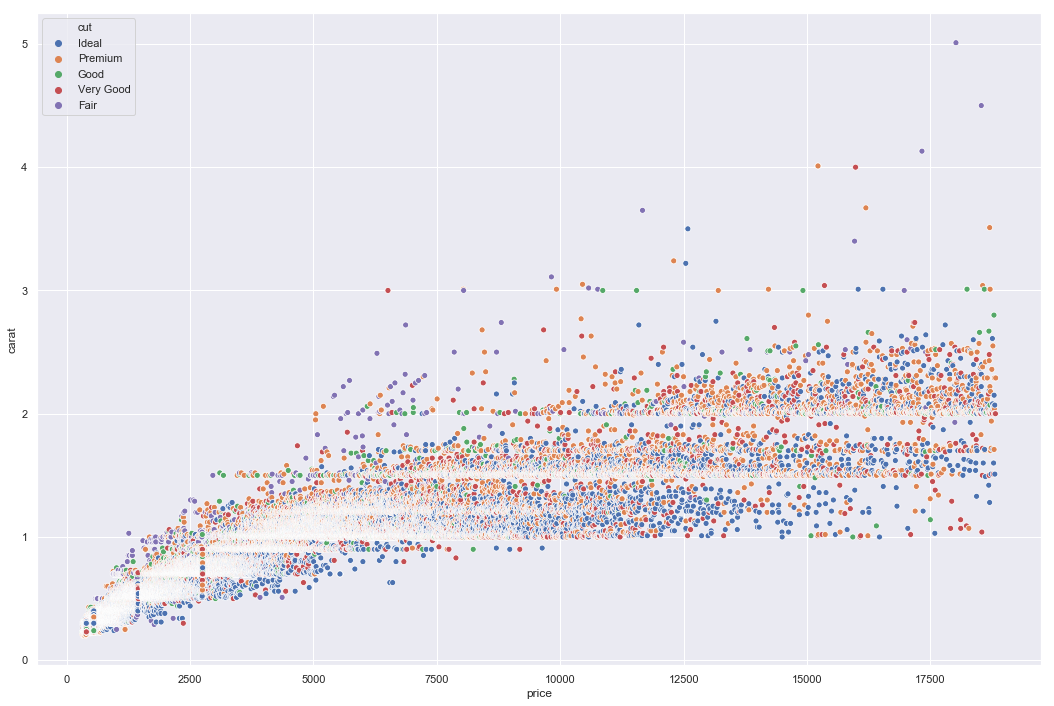

In [90]:
plt.figure(figsize=(18,12))

sns.scatterplot(x='price',y='carat', data = df, hue = 'cut');

**Conclusions:**  
While price and carat appear to be much more strongly correlated than cut (included as hue in the scatter to illustrate), carat still doesn't appear to account for most price increases, especially at the higher end.

